<a href="https://www.kaggle.com/code/azminetoushikwasi/cr7-extensive-eda-analytics-cristiano-ronaldo?scriptVersionId=94832386" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# CR7 - Extensive EDA & Analytics - Cristiano Ronaldo - All Club Goals Stats

**Cristiano Ronaldo dos Santos Aveiro** is a Portuguese professional footballer who plays as a forward for Premier League club Manchester United and captains the Portugal national team.
 
- Current team: Portugal national football team (#7 / Forward) Trending
                                               
- Born: February 5, 1985 (age 37 years), Hospital Dr. Nélio Mendonça, Funchal, Portugal
- Height: 1.87 m
- Partner: Georgina Rodríguez (2017–)
- Salary: 26.52 million GBP (2022)
- Children: Cristiano Ronaldo Jr., Alana Martina dos Santos Aveiro, Eva Maria Dos Santos, Mateo Ronaldo

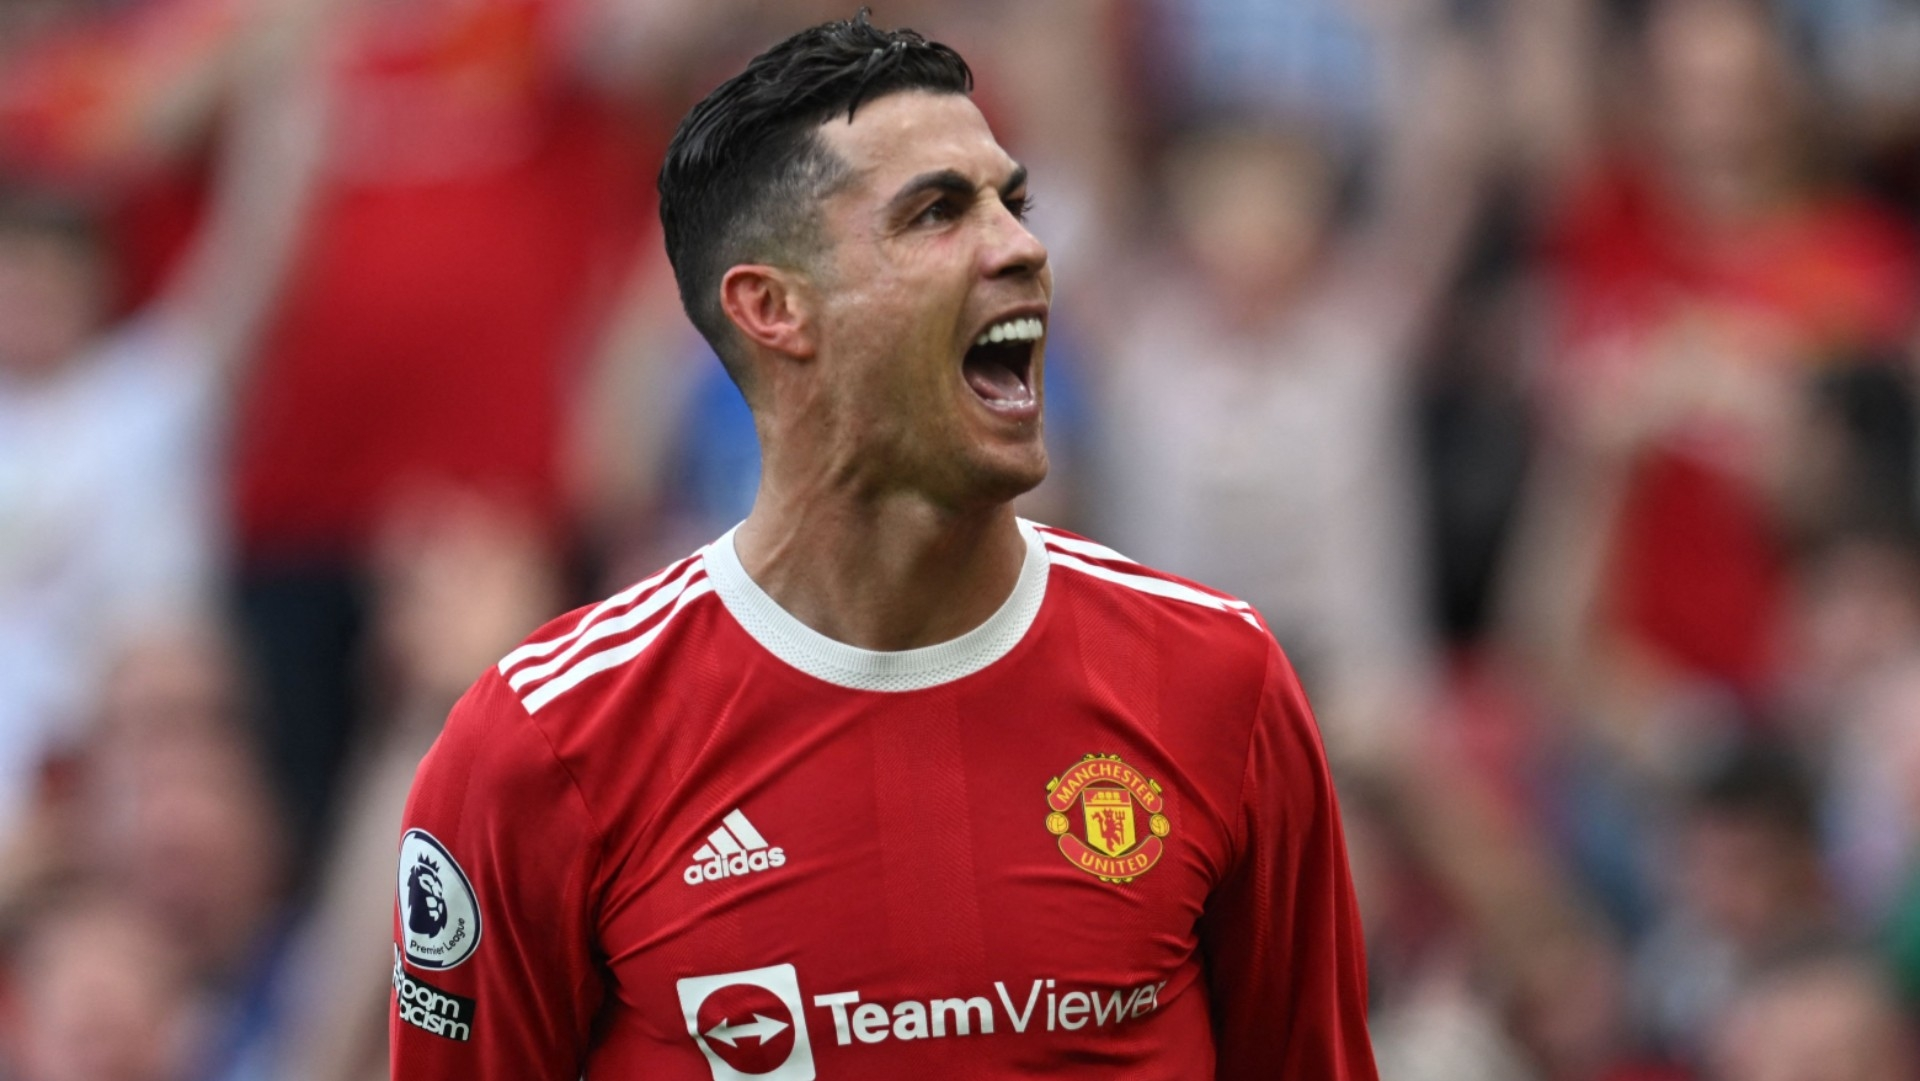

# Data Loading

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cr7-cristiano-ronaldo-all-club-goals-stats/.gitattributes
/kaggle/input/cr7-cristiano-ronaldo-all-club-goals-stats/data.csv


In [2]:
df=pd.read_csv("/kaggle/input/cr7-cristiano-ronaldo-all-club-goals-stats/data.csv")

# Basic Exploration

In [3]:
df.head()

,Unnamed: 0,Goal_no,Season,Competition,Matchday,Venue,Team,Opponent,Result,Position,Minute,At_score,Type_of_goal
0,0,1,2/3,Liga Portugal,6,H,Sporting CP,Moreirense FC,3:0,LW,34,2:0,Solo run
1,1,2,2/3,Liga Portugal,6,H,Sporting CP,Moreirense FC,3:0,NaN,90+5,3:0,Header
2,2,3,2/3,Liga Portugal,8,A,Sporting CP,Boavista FC,1:2,NaN,88,1:2,Right-footed shot
3,3,4,2/3,TaÃ§a de Portugal Placard,Fourth Round,H,Sporting CP,CD Estarreja,4:1,NaN,67,3:0,Left-footed shot
4,4,5,2/3,TaÃ§a de Portugal Placard,Fifth Round,H,Sporting CP,FC Oliveira do Hospital,8:1,NaN,13,3:0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    698 non-null    int64 
 1   Goal_no       698 non-null    int64 
 2   Season        698 non-null    object
 3   Competition   698 non-null    object
 4   Matchday      698 non-null    object
 5   Venue         698 non-null    object
 6   Team          698 non-null    object
 7   Opponent      698 non-null    object
 8   Result        698 non-null    object
 9   Position      640 non-null    object
 10  Minute        698 non-null    object
 11  At_score      698 non-null    object
 12  Type_of_goal  683 non-null    object
dtypes: int64(2), object(11)
memory usage: 71.0+ KB


# Exploritory Data Analysis

## Goals per competition

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per competition')

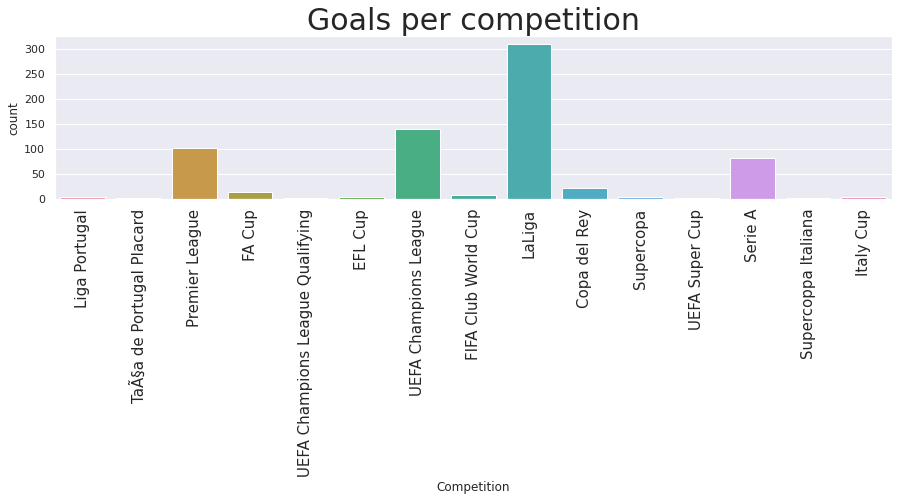

In [5]:
sns.set(rc={'figure.figsize':(15,3)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Competition'],hue_order=df.groupby('Competition'))
p.axes.set_title("Goals per competition",fontsize=30)

## Goals per season

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per season')

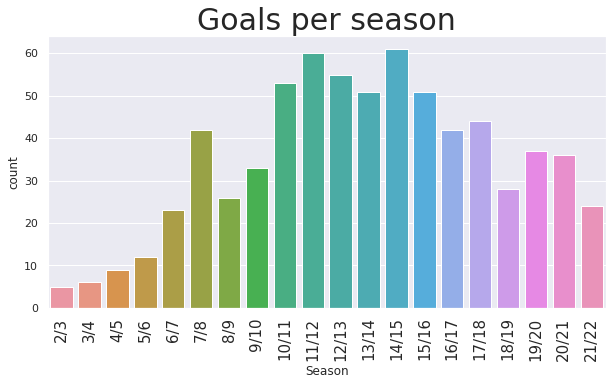

In [6]:
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Season'],hue_order=df.groupby('Competition'))
p.axes.set_title("Goals per season",fontsize=30)

## Goals per Clubs

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per Team')

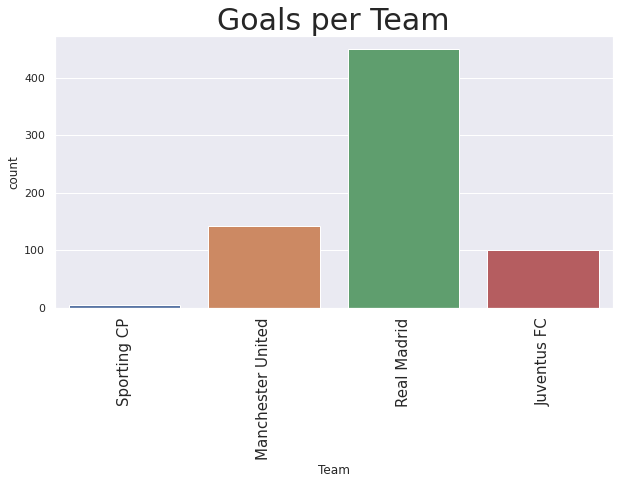

In [7]:
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Team'],hue_order=df.groupby('Competition'))
p.axes.set_title("Goals per Team",fontsize=30)

## Goals per playing Position

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per Position')

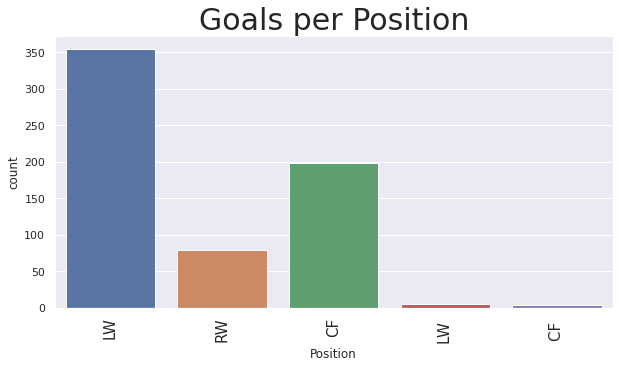

In [8]:
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Position'],hue_order=df.groupby('Competition'))
p.axes.set_title("Goals per Position",fontsize=30)

## Goals per Game Minute

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per Game Minute')

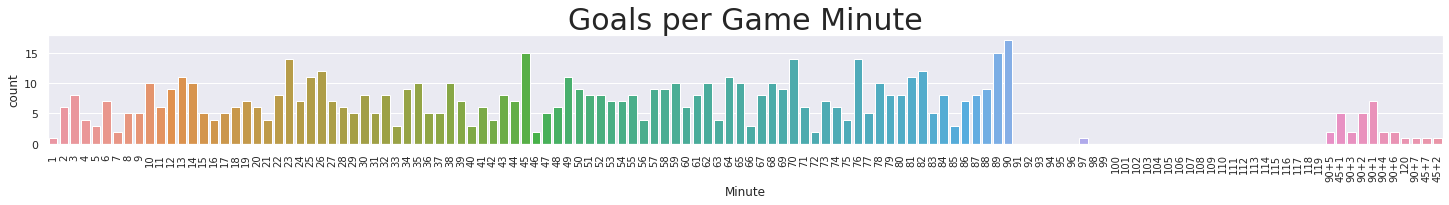

In [9]:
sns.set(rc={'figure.figsize':(25,2)})
plt.xticks(fontsize=10,rotation='vertical')
mins=list(map(str, range(1,120)))
for min in df['Minute']:
    if min not in mins:
        mins.append(min)

p=sns.countplot(df['Minute'],order=mins)
p.axes.set_title("Goals per Game Minute",fontsize=30)



## Goals per Type_of_goal

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per Type_of_goal')

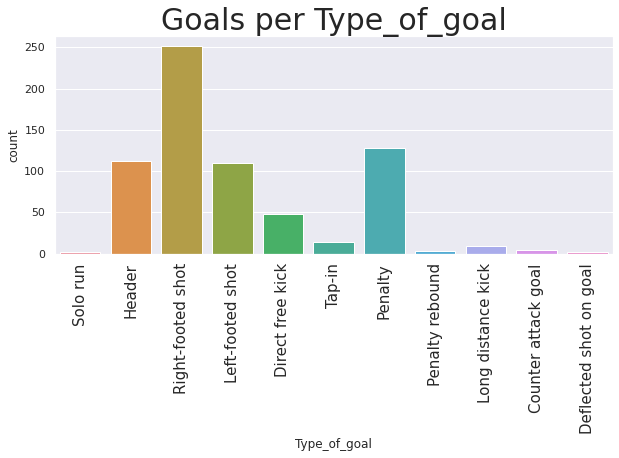

In [10]:
sns.set(rc={'figure.figsize':(10,4)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Type_of_goal'],hue_order=df.groupby('Competition'))
p.axes.set_title("Goals per Type_of_goal",fontsize=30)

## Scoreline after goal

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per At_score')

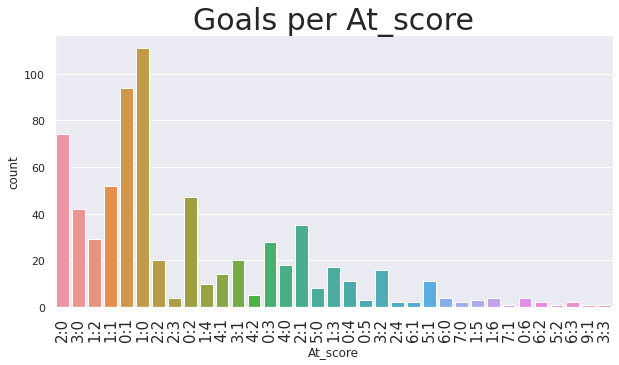

In [11]:
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['At_score'],hue_order=df.groupby('Competition'))
p.axes.set_title("Goals per At_score",fontsize=30)

## Opponents

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per Opponent')

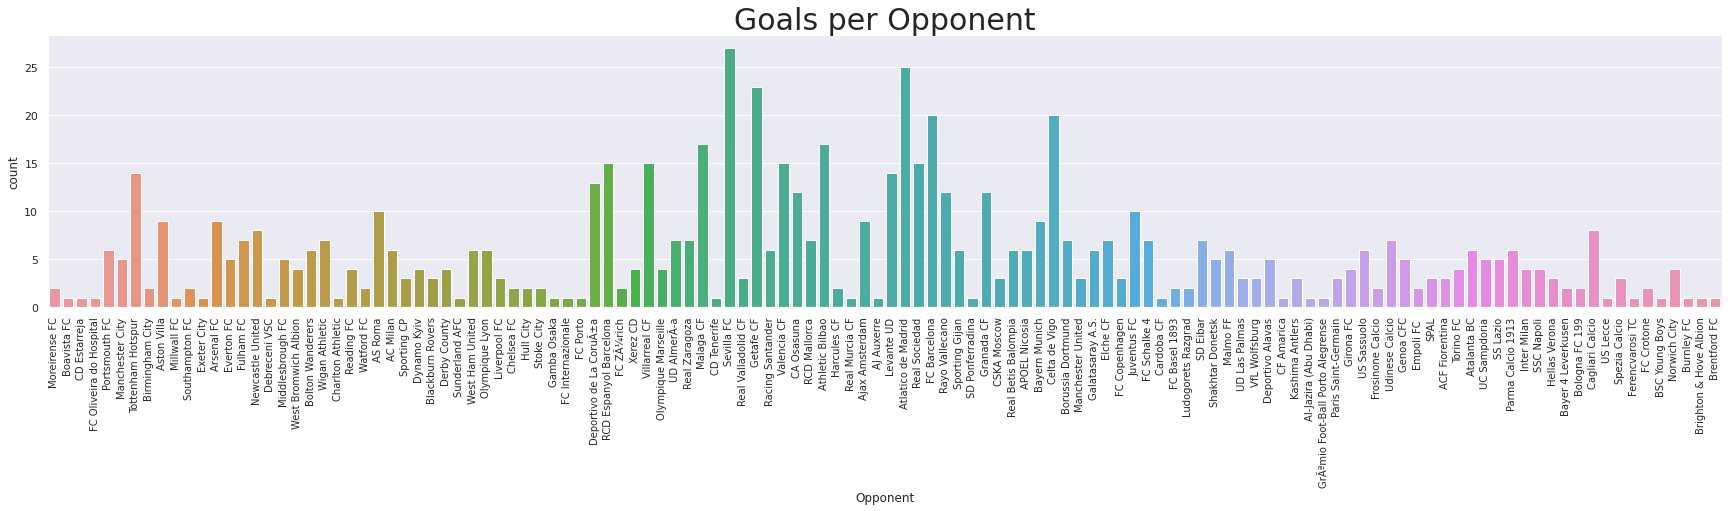

In [12]:
sns.set(rc={'figure.figsize':(30,5)})
plt.xticks(fontsize=10,rotation='vertical')
p=sns.countplot(df['Opponent'],hue_order=df.groupby('Competition'))
p.axes.set_title("Goals per Opponent",fontsize=30)

## Favourite Opponents

<BarContainer object of 7 artists>

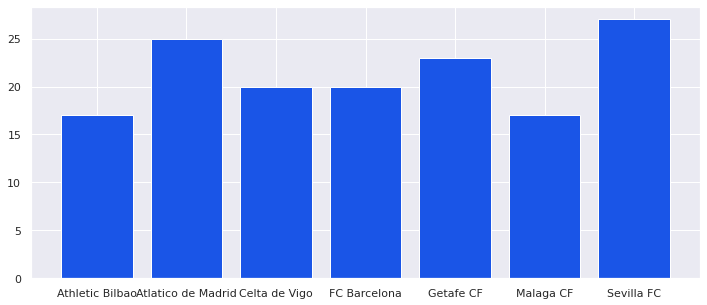

In [13]:
sns.set(rc={'figure.figsize':(12,5)})
opponents_df=df.groupby('Opponent').size().reset_index(name='count')
fav_opponents_df=opponents_df[opponents_df["count"]>15]
plt.bar(x=fav_opponents_df['Opponent'],height=fav_opponents_df['count'],color="#1a55e7")

## Home - Away goals

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Goals per Venue(Home/Away)')

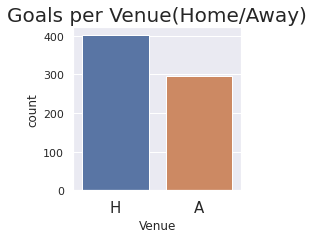

In [14]:
sns.set(rc={'figure.figsize':(3,3)})
plt.xticks(fontsize=15)
p=sns.countplot(df['Venue'],hue_order=df.groupby('Competition'))
p.axes.set_title("Goals per Venue(Home/Away)",fontsize=20)

# More coming soon